### Investigate a Restart File

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import viz_tools
from salishsea_tools import tidetools
from salishsea_tools import nc_tools

In [2]:
filename = '/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/base_run/E5s/SalishSea_00055981_restart.nc'
fT = NC.Dataset(filename,'r')

In [5]:
# Check Dimensions
nc_tools.show_dimensions(fT)

<type 'netCDF4.Dimension'>: name = 'x', size = 398

<type 'netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4.Dimension'>: name = 'z', size = 40

<type 'netCDF4.Dimension'> (unlimited): name = 't', size = 1



In [6]:
# Check Variables
nc_tools.show_variables(fT)

[u'nav_lon', u'nav_lat', u'nav_lev', u'time_counter', u'kt', u'ndastp', u'adatrj', u'rnf_b', u'rnf_hc_b', u'rnf_sc_b', u'utau_b', u'vtau_b', u'qns_b', u'emp_b', u'sfx_b', u'en', u'avt', u'avm', u'avmu', u'avmv', u'mxln', u'ub2_b', u'vb2_b', u'sbc_hc_b', u'sbc_sc_b', u'qsr_hc_b', u'fraqsr_1lev', u'fse3t_b', u'fse3t_n', u'rdt', u'rdttra1', u'ub', u'vb', u'tb', u'sb', u'rotb', u'hdivb', u'sshb', u'un', u'vn', u'tn', u'sn', u'rotn', u'hdivn', u'sshn', u'rhop']


In [31]:
sshn = fT.variables['sshn'][0,:]
print sshn.shape
me = sshn == 0
etan = np.ma.array(sshn,mask=me)

(898, 398)


<matplotlib.colorbar.Colorbar instance at 0x7fb539525d88>

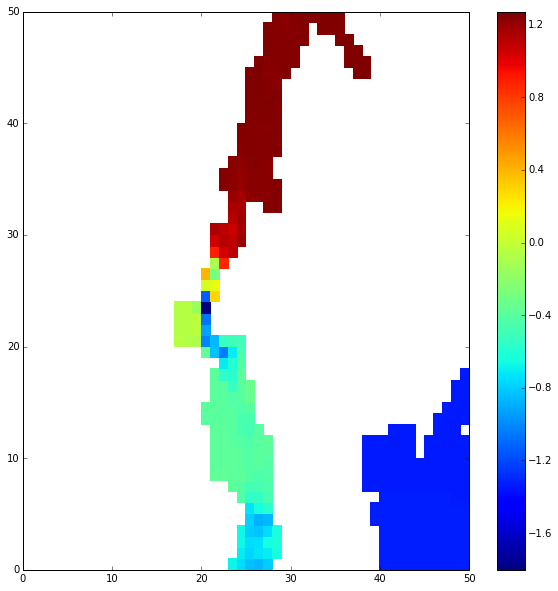

In [38]:
imin = 700; imax = 898; jmin = 100; jmax=300
imin = 750; imax = 800; jmin = 100; jmax=150
fig, ax = plt.subplots(1,1,figsize=(10,10))
mesh = ax.pcolormesh(etan[imin:imax,jmin:jmax])
fig.colorbar(mesh)

In [29]:
vvel =  fT.variables['vb'][0,:]
print vvel.shape
me = vvel == 0
v = np.ma.array(vvel,mask=me)

(40, 898, 398)


0 4.1103789126 -7.68411912978


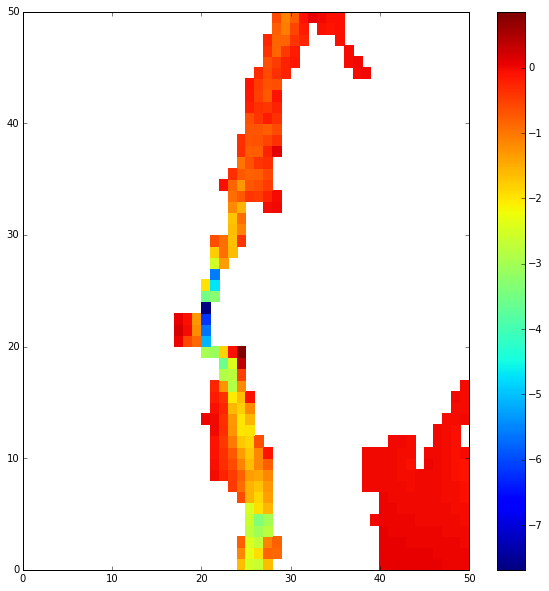

In [40]:
level = 0; imin = 00; imax = 898; jmin = 0; jmax=398
imin = 750; imax = 800; jmin = 100; jmax=150

fig, ax = plt.subplots(1,1,figsize=(10,10))
mesh = ax.pcolormesh(v[level,imin:imax,jmin:jmax])
fig.colorbar(mesh)
print level, v[level].max(), v[level].min()

In [34]:
sshb = fT.variables['sshb'][0,:]
print sshb.shape
me = sshb == 0
etab = np.ma.array(sshb,mask=me)
eta = etan - etab

(898, 398)


<matplotlib.colorbar.Colorbar instance at 0x7fb5393cc6c8>

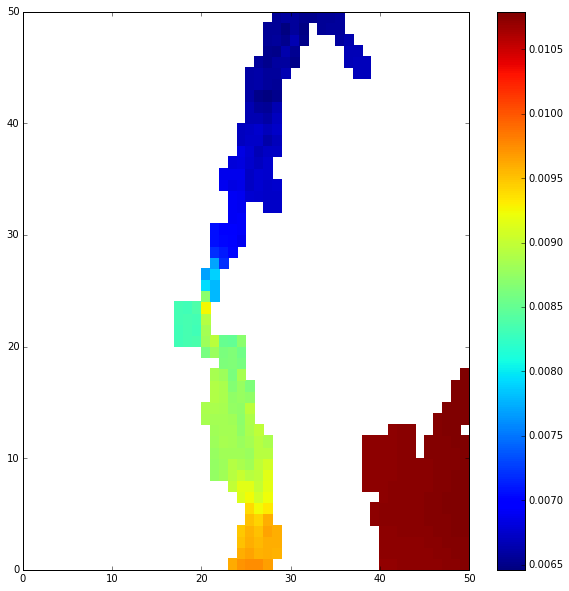

In [37]:
imin = 750; imax = 800; jmin = 100; jmax=150
fig, ax = plt.subplots(1,1,figsize=(10,10))
mesh = ax.pcolormesh(eta[imin:imax,jmin:jmax])
fig.colorbar(mesh)